# Crime Analysis with City of Calgary Crime Data

Data downloaded from the [City of calgary's Open Data Portal](https://data.calgary.ca) on July 24, 2022.

In [1]:
# import Python modules
import os
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import style as mplstyle

# use the ggplot style
plt.style.use('ggplot')

# variables
crime_data = 'Community_Crime_Statistics.csv'

current_path = os.getcwd()
crime_data_path = os.path.join(current_path, crime_data)

## Load the crime data into a dataframe
- We'll select from this data for our visualizations.




In [2]:
# load crime data
df = pd.read_csv(crime_data_path)
df.head()
# df.info(verbose=False)
# df.columns

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,long,lat,ID,Community Center Point
0,CENTRE,INGLEWOOD,Theft OF Vehicle,1,NaN,2017/04,2017,APR,-114.019120,51.034141,2017-APR-INGLEWOOD-Theft OF Vehicle,POINT (-114.01912 51.03414052)
1,EAST,SOUTHVIEW,Theft FROM Vehicle,3,NaN,2017/04,2017,APR,-113.997338,51.034156,2017-APR-SOUTHVIEW-Theft FROM Vehicle,POINT (-113.9973381 51.03415568)
2,NORTHWEST,BOWNESS,Theft OF Vehicle,10,NaN,2017/08,2017,AUG,-114.187826,51.083359,2017-AUG-BOWNESS-Theft OF Vehicle,POINT (-114.187826 51.08335944)
3,SOUTH,CANYON MEADOWS,Theft OF Vehicle,3,NaN,2017/01,2017,JAN,-114.082182,50.940964,2017-JAN-CANYON MEADOWS-Theft OF Vehicle,POINT (-114.0821823 50.94096383)
4,NORTHEAST,MAYLAND,Theft OF Vehicle,2,NaN,2017/01,2017,JAN,-114.010297,51.052393,2017-JAN-MAYLAND-Theft OF Vehicle,POINT (-114.0102966 51.05239341)


## Total crimes from January 2017 to July 2022
Create a stacked bar graph to show total crime from January 2017 to July 2022.

In [3]:
# Select data to show all crime by year
df_crime = df[['Category','Crime Count', 'Year']]
df_crime.head()

,Category,Crime Count,Year
0,Theft OF Vehicle,1,2017
1,Theft FROM Vehicle,3,2017
2,Theft OF Vehicle,10,2017
3,Theft OF Vehicle,3,2017
4,Theft OF Vehicle,2,2017


In [4]:
# Pivot Table
pivot = pd.pivot_table(
    data=df_crime,
    values='Crime Count',
    index=['Year'],
    columns=['Category'],
    aggfunc='sum'
)

# Sort the number of crimes in descending order so
# when we create the visualization, the largest bars will be at the bottom
pivot = pivot.sort_values([2017], ascending=False, axis=1)
pivot

Category,Theft FROM Vehicle,Theft OF Vehicle,Break & Enter - Commercial,Assault (Non-domestic),Break & Enter - Dwelling,Break & Enter - Other Premises,Violence Other (Non-domestic),Street Robbery,Commercial Robbery
Year,,,,,,,,,
2017,13083,6123,4531,3341,2471,1992,1840,506,315
2018,12594,6048,5039,3846,2683,2109,1943,660,305
2019,14681,6038,5787,3915,2392,2294,1877,643,384
2020,12331,4676,4188,3519,1677,2484,1931,524,281
2021,10132,4497,3279,4044,1610,1919,2150,584,363
2022,6178,2808,2374,2017,850,1108,899,241,238


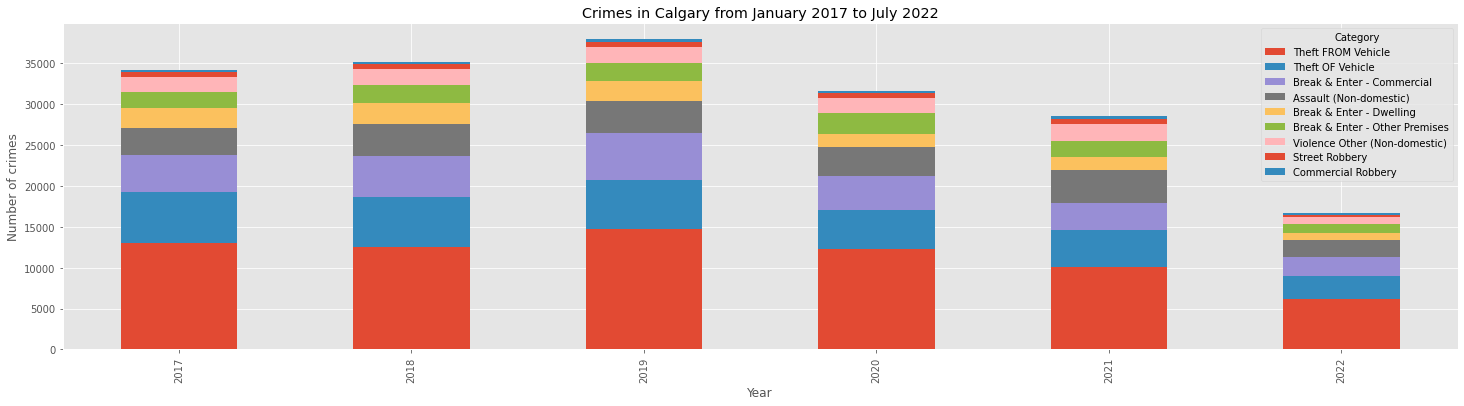

In [5]:
# Plot the pivot data
pivot.plot(kind='bar', stacked=True, figsize=(25, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of crimes') # add y-label to the plot
plt.title('Crimes in Calgary from January 2017 to July 2022') # add title to the plot

plt.show()

## Find the top 5 neighbourhoods of total crimes


In [6]:
# Select data to show all crime by year
df_crime_comm = df[['Community Name', 'Category','Crime Count']]
df_crime_comm.head()

,Community Name,Category,Crime Count
0,INGLEWOOD,Theft OF Vehicle,1
1,SOUTHVIEW,Theft FROM Vehicle,3
2,BOWNESS,Theft OF Vehicle,10
3,CANYON MEADOWS,Theft OF Vehicle,3
4,MAYLAND,Theft OF Vehicle,2


In [7]:
# Create the pivot table

comm_pivot = pd.pivot_table(
    data=df_crime_comm,
    values="Crime Count",
    index=['Community Name'],
    aggfunc='sum'
)

comm_pivot.head()

,Crime Count
Community Name,
01B,23
01C,36
01D,1
01F,13
01H,7


In [8]:
# Select the top 5 communities
df_crime_comm_top5 = comm_pivot.sort_values(['Crime Count'], ascending=False, axis=0).head(5)
df_crime_comm_top5

,Crime Count
Community Name,
BELTLINE,9122
DOWNTOWN COMMERCIAL CORE,6359
FOREST LAWN,2818
BOWNESS,2348
MANCHESTER INDUSTRIAL,2131


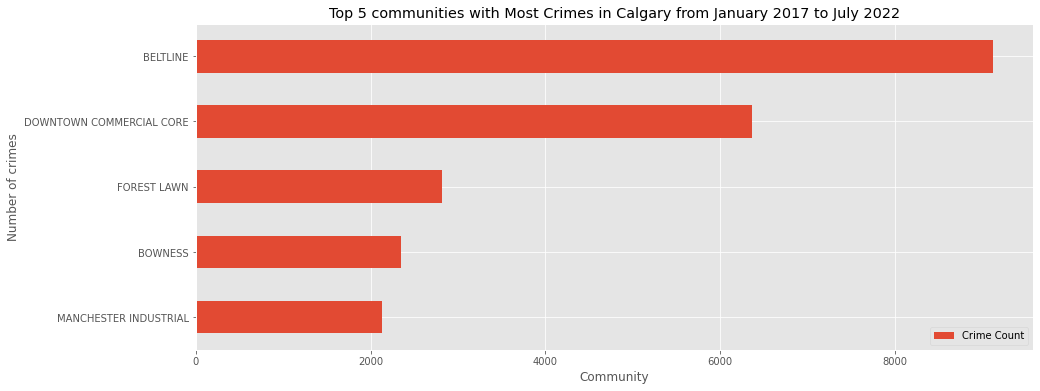

In [9]:
# Vizualize in horizontal bar graph

# Plot the pivot data
(df_crime_comm_top5
    .sort_values(['Crime Count'], ascending=True, axis=0)
    .plot(kind='barh', stacked=False, figsize=(15, 6))
)

plt.xlabel('Community') # add to x-label to the plot
plt.ylabel('Number of crimes') # add y-label to the plot
plt.title('Top 5 communities with Most Crimes in Calgary from January 2017 to July 2022') # add title to the plot

plt.show()

## Dot Density Map

We need a CSV of communites and the count of each type of crime. We can create this CSV with a pivot table function in Pandas.

A dot density map is created with random points within a geographic area.

In [10]:
# Select the fields we need for a spatial joint.

df_crime_map = df[['Community Name', 'Category','Crime Count']]
df_crime_map.head()

,Community Name,Category,Crime Count
0,INGLEWOOD,Theft OF Vehicle,1
1,SOUTHVIEW,Theft FROM Vehicle,3
2,BOWNESS,Theft OF Vehicle,10
3,CANYON MEADOWS,Theft OF Vehicle,3
4,MAYLAND,Theft OF Vehicle,2


In [11]:
# Create the pivot table

map_pivot = pd.pivot_table(
    data=df_crime_map,
    values="Crime Count",
    index=['Community Name'],
    columns=['Category'],
    aggfunc='sum'
)

map_pivot.head()

Category,Assault (Non-domestic),Break & Enter - Commercial,Break & Enter - Dwelling,Break & Enter - Other Premises,Commercial Robbery,Street Robbery,Theft FROM Vehicle,Theft OF Vehicle,Violence Other (Non-domestic)
Community Name,,,,,,,,,
01B,NaN,9.0,1.0,NaN,NaN,NaN,8.0,4.0,1.0
01C,1.0,9.0,NaN,2.0,NaN,NaN,13.0,9.0,2.0
01D,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
01F,1.0,2.0,4.0,NaN,NaN,NaN,3.0,3.0,NaN
01H,NaN,NaN,1.0,NaN,NaN,NaN,4.0,2.0,NaN


In [12]:
# Set NaN values to 0
map_pivot = map_pivot.fillna(0)
map_pivot.head(5)

Category,Assault (Non-domestic),Break & Enter - Commercial,Break & Enter - Dwelling,Break & Enter - Other Premises,Commercial Robbery,Street Robbery,Theft FROM Vehicle,Theft OF Vehicle,Violence Other (Non-domestic)
Community Name,,,,,,,,,
01B,0.0,9.0,1.0,0.0,0.0,0.0,8.0,4.0,1.0
01C,1.0,9.0,0.0,2.0,0.0,0.0,13.0,9.0,2.0
01D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
01F,1.0,2.0,4.0,0.0,0.0,0.0,3.0,3.0,0.0
01H,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0


In [13]:
# Export the pivot table as a CSV.
# The CSV will be used in QGIS.

crime_map_data = 'Crime_Map_Data.csv'
map_pivot.to_csv(os.path.join(current_path, crime_map_data))